# 1 Written: Understanding word2vec (31 points)

Recall that the key insight behind word2vec is that ‘a word is known by the company it keeps’. Concretely,
consider a ‘center’ word c surrounded before and after by a context of a certain length. We term words in
this contextual window ‘outside words’ (O). For example, in Figure 1, the context window length is 2, the
center word c is ‘banking’, and the outside words are ‘turning’, ‘into’, ‘crises’, and ‘as’:

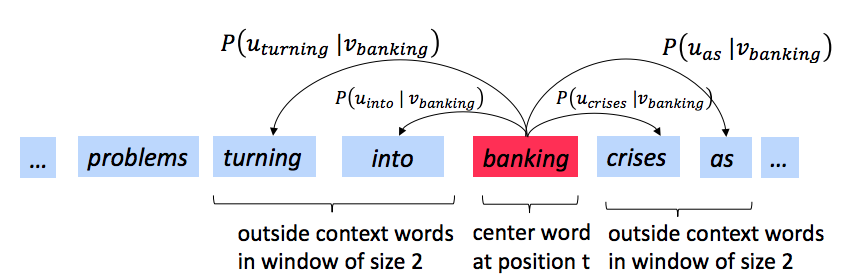

Skip-gram word2vec aims to learn the probability distribution P(O|C). Specifically, given a specific word o and a specific word c, we want to predict P(O = o|C = c): the probability that word o is an ‘outside’ word
for c (i.e., that it falls within the contextual window of c). We model this probability by taking the softmax function over a series of vector dot-products:

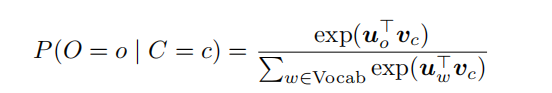

For each word, we learn vectors u and v, where uo is the ‘outside’ vector representing outside word o, and
vc is the ‘center’ vector representing center word c. We store these parameters in two matrices, U and V .
The columns of U are all the ‘outside’ vectors uw; the columns of V are all of the ‘center’ vectors vw. Both
U and V contain a vector for every w ∈ Vocabulary.1
Recall from lectures that, for a single pair of words c and o, the loss is given by:

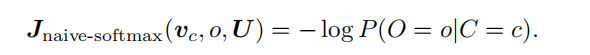

We can view this loss as the cross-entropy2（交叉熵） between the true distribution y and the predicted distribution yˆ,
for a particular center word c and a particular outside word o. Here, both y and yˆ are vectors with length
equal to the number of words in the vocabulary. Furthermore, the kth entry in these vectors indicates the conditional probability of the kth word being an ‘outside word’ for the given c. The true empirical distribution y is a one-hot vector with a 1 for the true outside word o, and 0 everywhere else, for this particular example of center word c and outside word o.3 The predicted distribution yˆ is the probability distribution P(O|C = c) given by our model in equation (1).

Note: Throughout this homework, when computing derivatives, please use the method reviewed during the
lecture (i.e. no Taylor Series Approximations).

(a) (2 points) Prove that the naive-softmax loss (Equation 2) is the same as the cross-entropy loss between
y and yˆ, i.e. (note that y, yˆ are vectors and yˆo is a scalar):

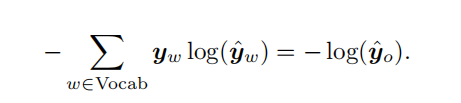

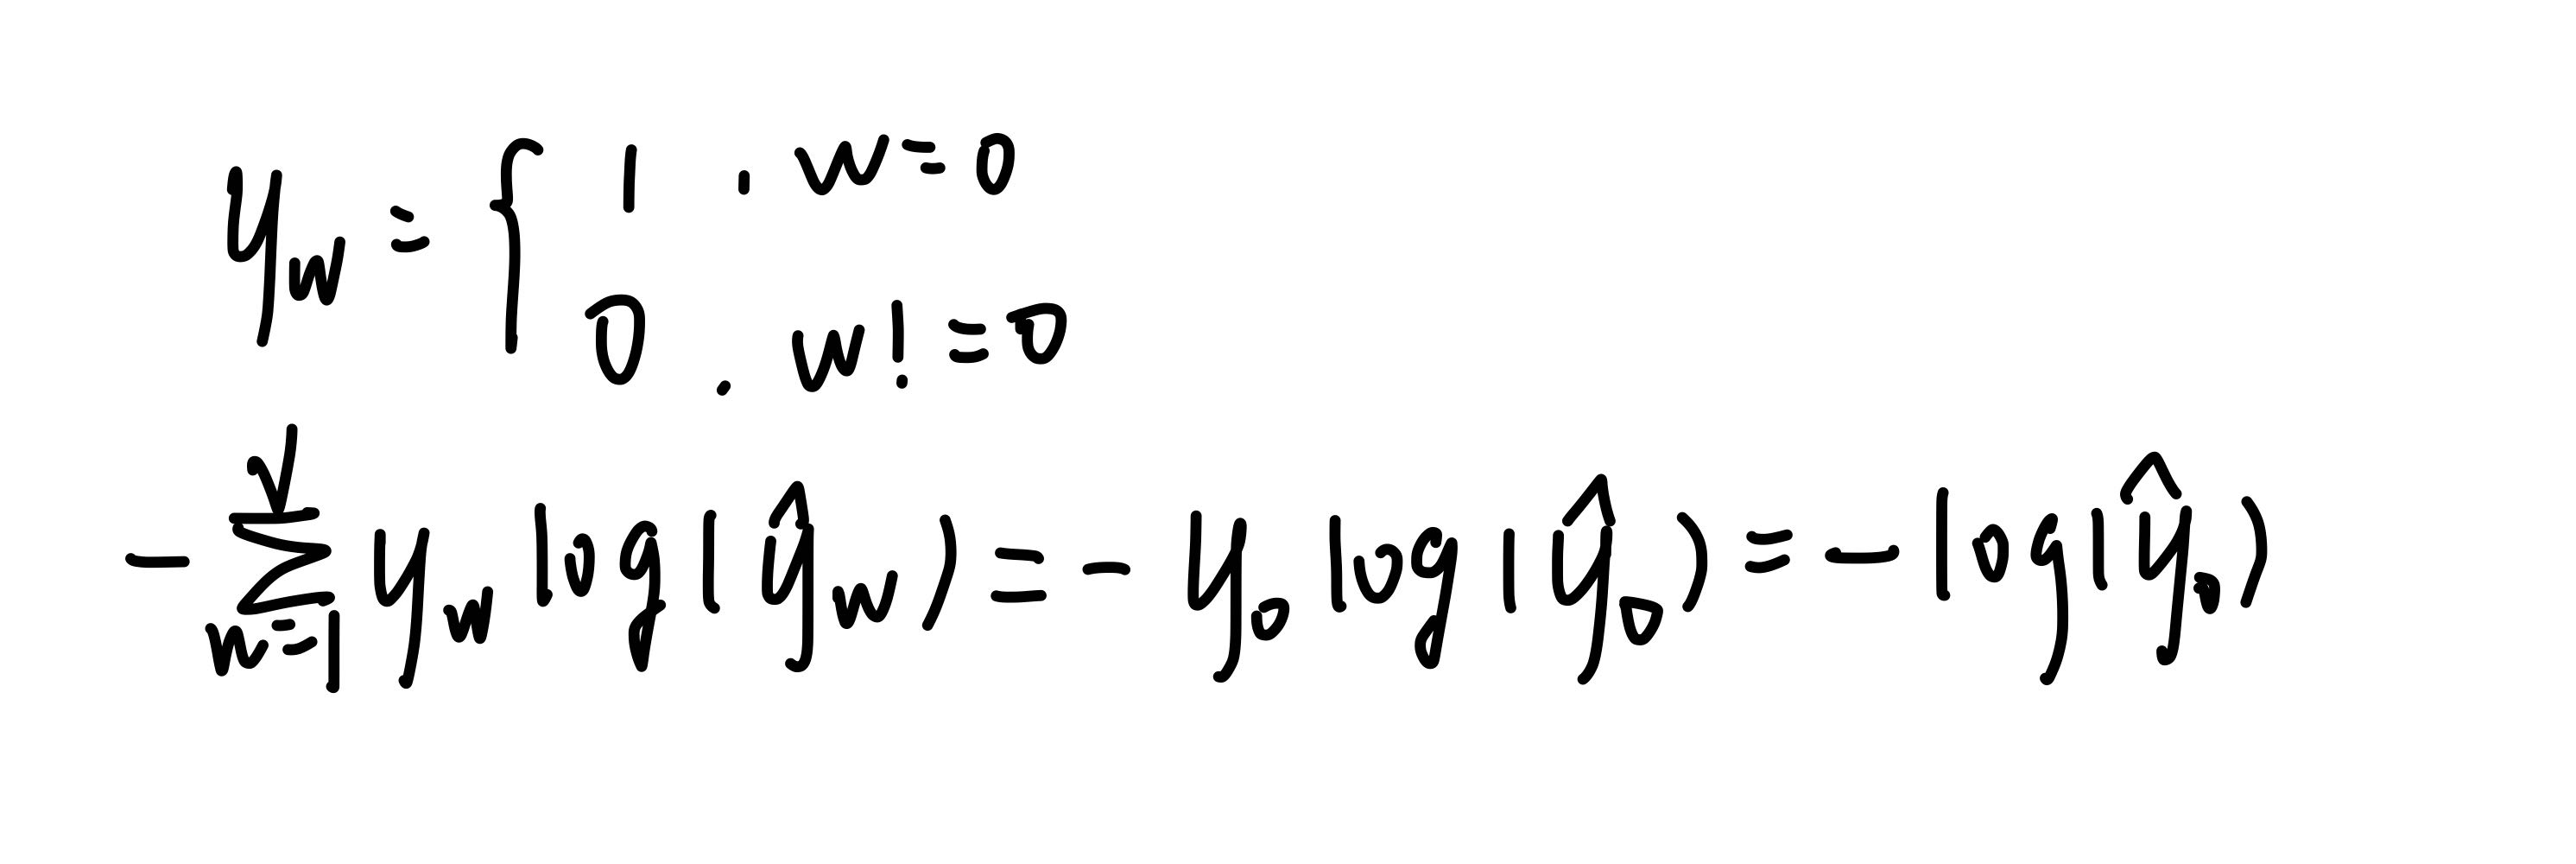

Your answer should be one line. You may describe your answer in words.  
(b)(7 points)

(i) Compute the partial derivative of Jnaive-softmax(vc, o, U) with respect to vc. Please write your
answer in terms of y, yˆ, U, and show your work to receive full credit.  
• Note: Your final answers for the partial derivative should follow the shape convention: the
partial derivative of any function f(x) with respect to x should have the same shape as x.  
• Please provide your answers for the partial derivative in vectorized form. For example, when
we ask you to write your answers in terms of y, yˆ, and U, you may not refer to specific
elements of these terms in your final answer (such as y1, y2, . . .).

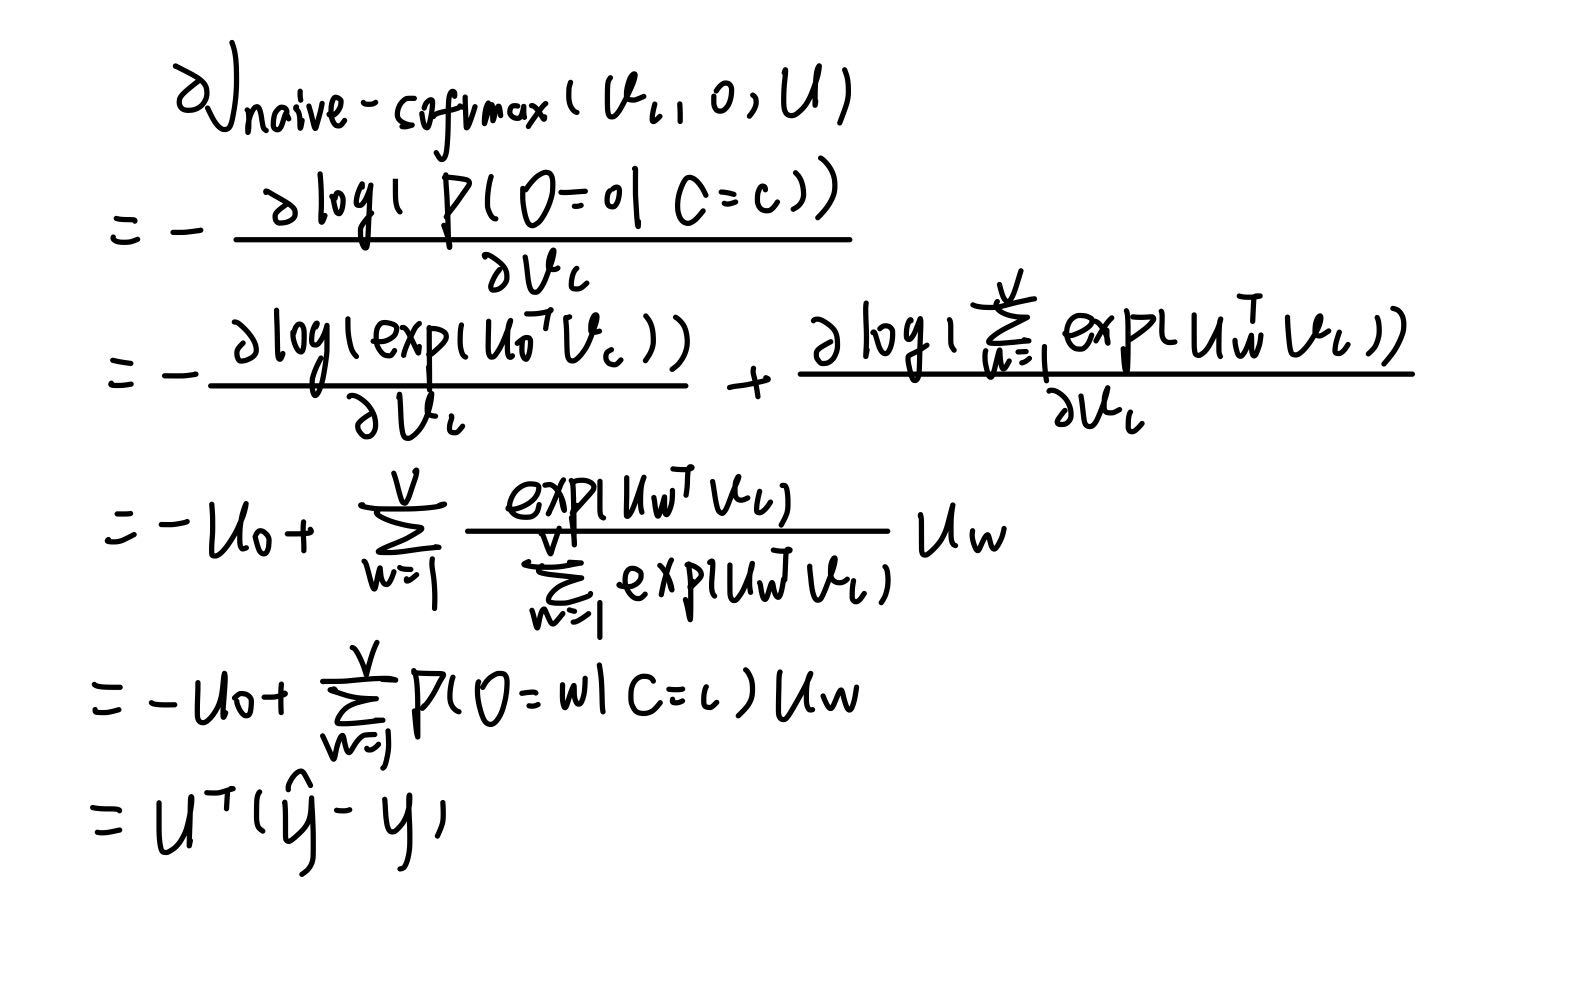

(ii) When is the gradient you computed equal to zero?  
Hint: You may wish to review and use some introductory linear algebra concepts.
yˆ=y时

(iii) The gradient you found is the difference between two terms. Provide an interpretation of how
each of these terms improves the word vector when this gradient is subtracted from the word
vector vc.

当原向量减掉一部分梯度之后，会更靠近真实的情况。

(iv) In many downstream applications using word embeddings, L2 normalized vectors (e.g. $u/||u||_2$
where $||u||_2$ =$\sqrt{\sum u^{2}}$) are used instead of their raw forms (e.g. u). Now, suppose you would like to classify phrases as being positive or negative. When would L2 normalization take away
useful information for the downstream task? When would it not? Hint: Consider the case where
$u_x = \alpha u_y$ for some words x $\neq$ y and some scalar $\alpha$.

向量的大小信息可能会损失，方向不会损失

(c) (5 points) Compute the partial derivatives of Jnaive-softmax(vc, o, U) with respect to each of the ‘outside’
word vectors, $u_w’s$ There will be two cases: when w = o, the true ‘outside’ word vector, and w $\neq$ o,
for all other words. Please write your answer in terms of y, yˆ, and vc. In this subpart, you may
use specific elements within these terms as well (such as y1, y2, . . .). Note that uw is a vector while
y1, y2, . . . are scalars. Show your work to receive full credit.

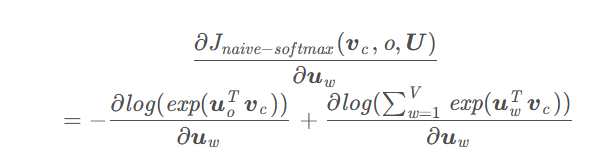

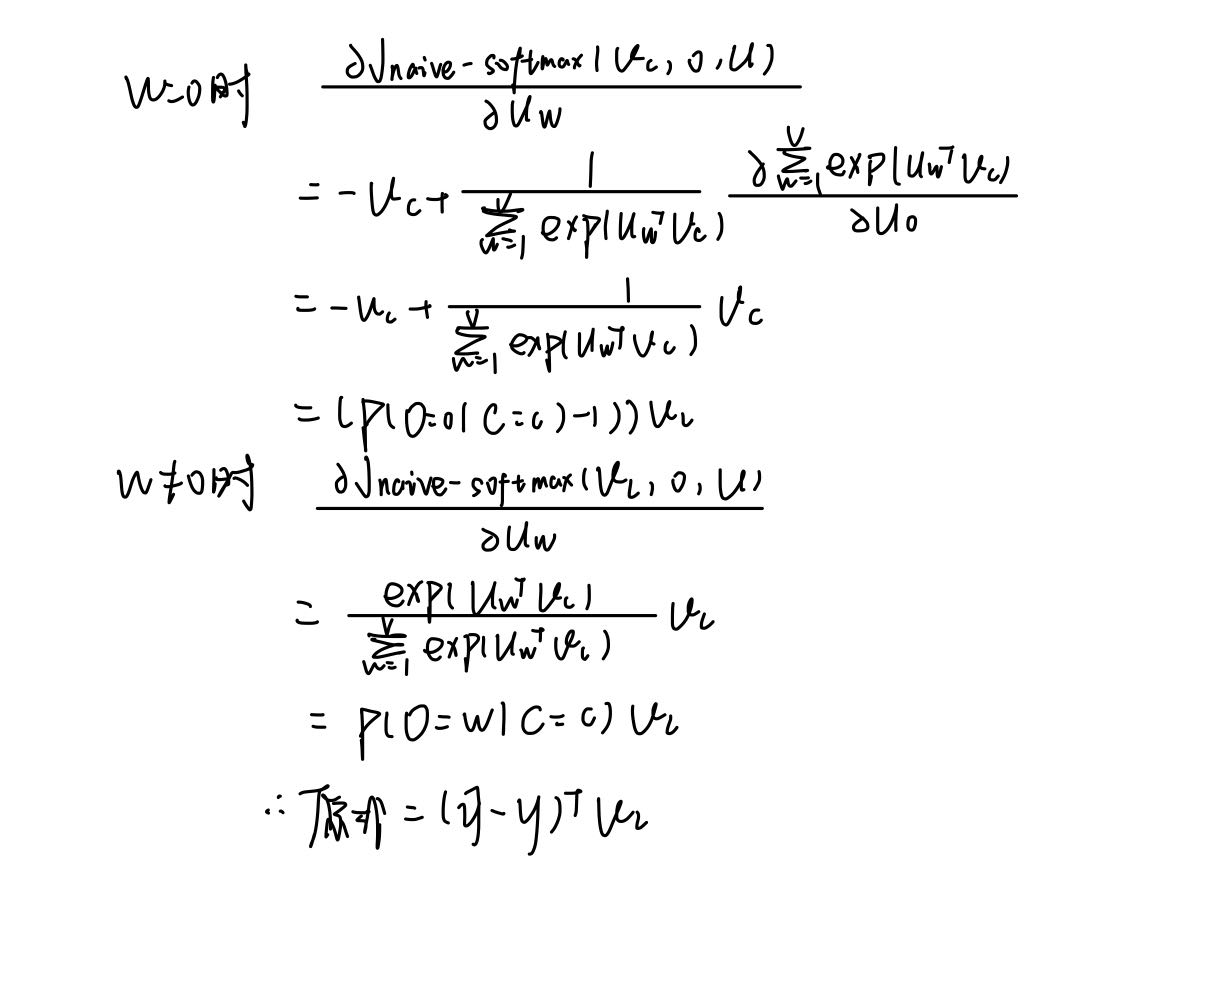

（d）(1 point) Write down the partial derivative of Jnaive-softmax(vc, o, U) with respect to U. Please break
down your answer in terms of the column vectors 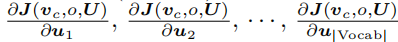
. No derivations
are necessary, just an answer in the form of a matrix.

(e) (2 points) The Leaky ReLU (Leaky Rectified Linear Unit) activation function is given by Equation 4
and Figure 2:  
f(x) = max(αx, x) (4)  
Where x is a scalar and 0 < α < 1, please compute the derivative of f(x) with respect to x. You may
ignore the case where the derivative is not defined at 0.

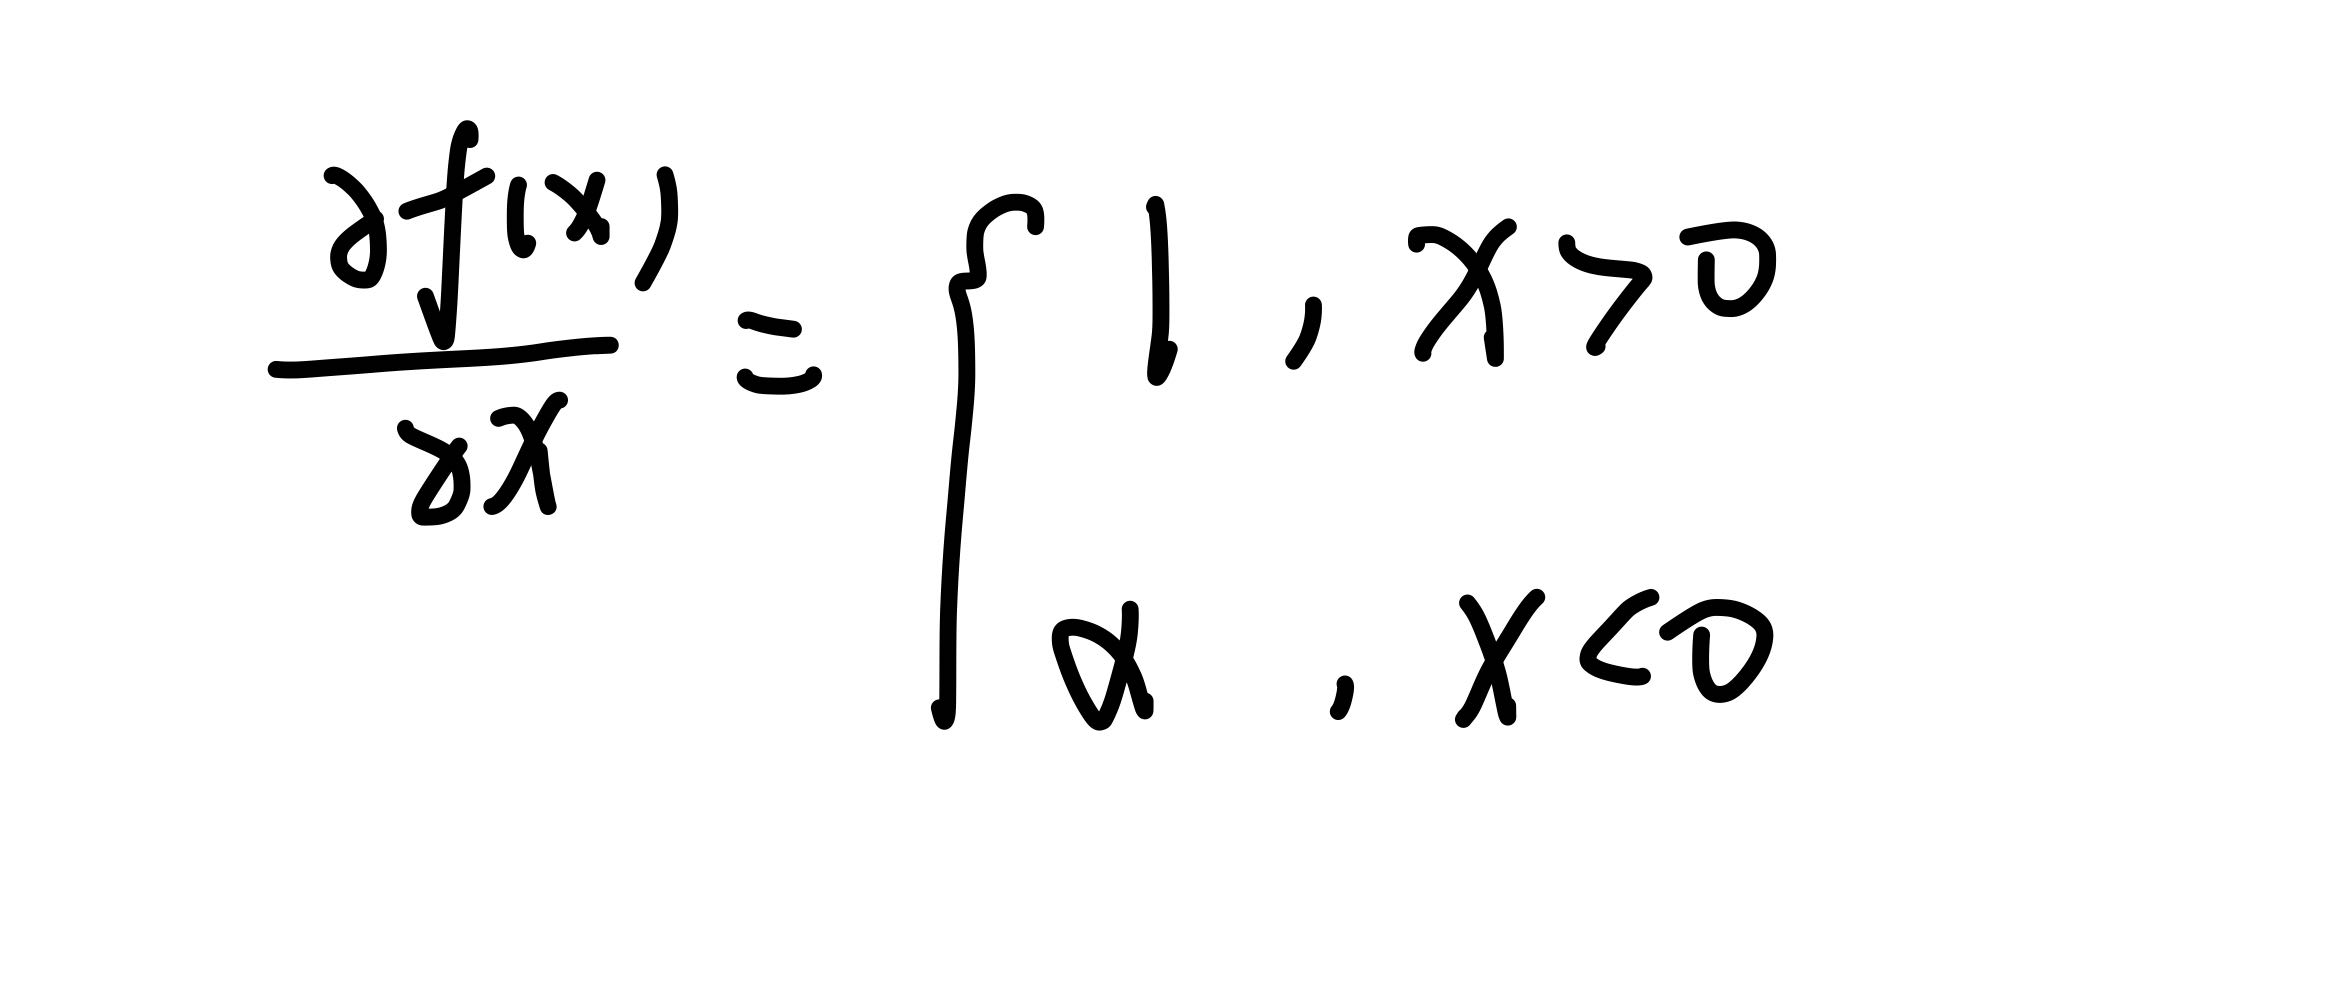

(f) (3 points) The sigmoid function is given by Equation 5:  
    $\sigma(x)=\frac{1}{1+e^{-x}}=\frac{e^x}{e^x+1}$

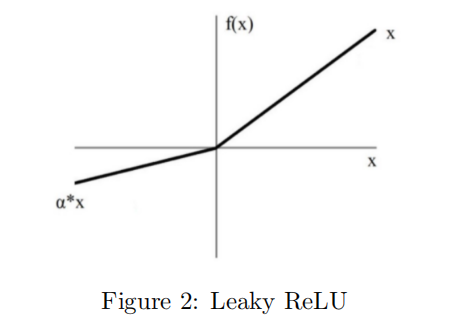

Please compute the derivative of σ(x) with respect to x, where x is a scalar. Please write your answer
in terms of σ(x). Show your work to receive full credit.

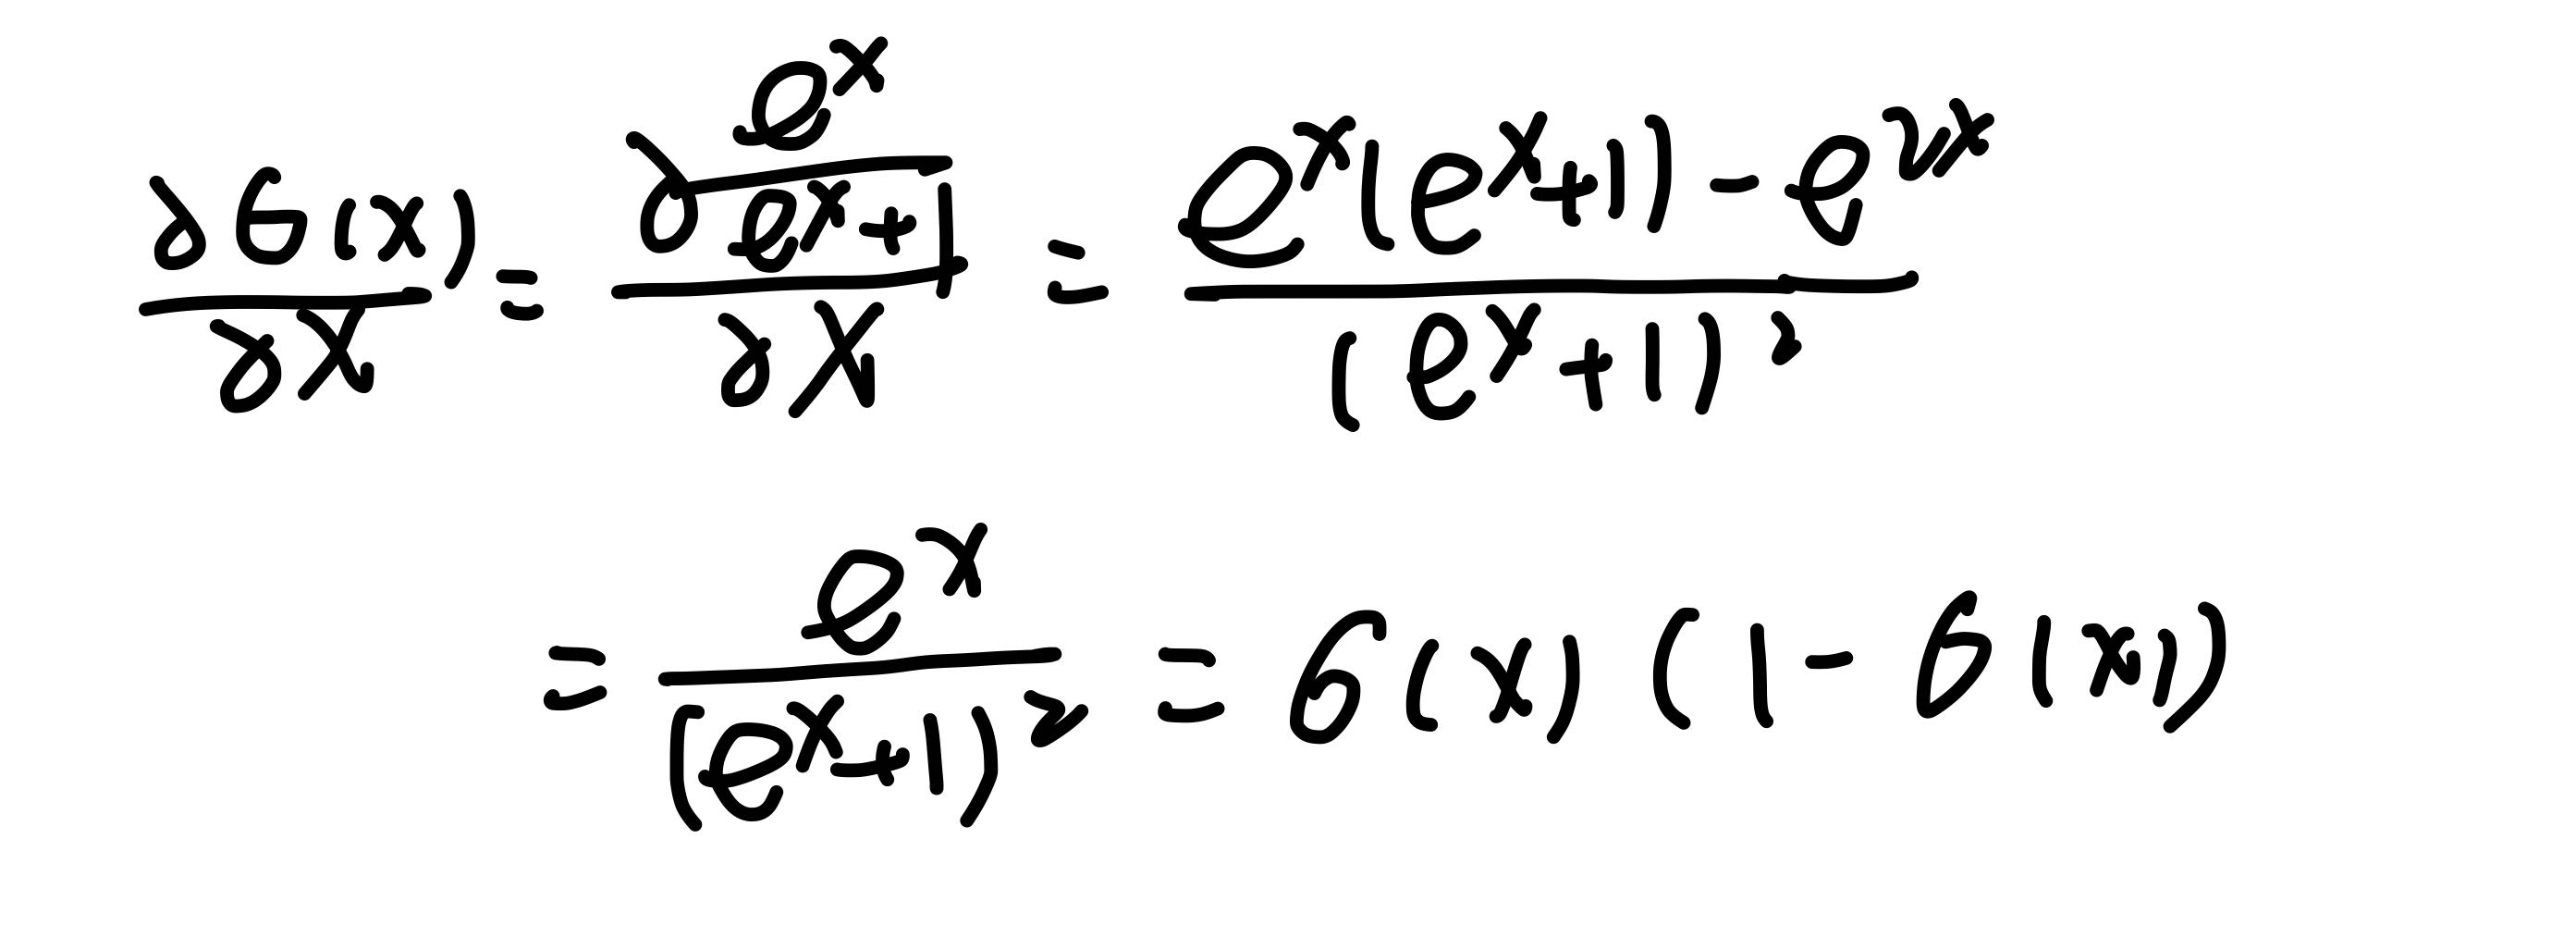

(g) (6 points) Now we shall consider the Negative Sampling loss, which is an alternative to the Naive
Softmax loss. Assume that K negative samples (words) are drawn from the vocabulary. For simplicity
of notation we shall refer to them as $w_1, w_2, . . . , w_K$, and their outside vectors as $u_w1,u_w2, . . . , u_wK$ .  
假设K个负样本是不同的， i $\neq$ j则$w_i \neq w_j$ i, j ∈ {1, . . . , K}，且 o $\notin {w_1, . . . , w_K}$.对于中心词 c 和外部词 o, 负采样函数为： 
$J_{neg-sample}$($v_c$, o, U) = $-log(\sigma(u_0^Tv_c))-\sum_{s=1}^{k}{log(\sigma(-u_{w_s}^Tv_c))}$

(i) Please repeat parts (b) and (c), computing the partial derivatives of $J_{neg-sample}$ with respect to $v_c$,
with respect to uo, and with respect to the $s^{th}$ negative sample $u_ws$. Please write your answers
in terms of the vectors $v_c, u_o, and u_{w_{s}}$, where s ∈ [1, K]. Show your work to receive full credit.
Note: you should be able to use your solution to part (f) to help compute the necessary gradients
here.

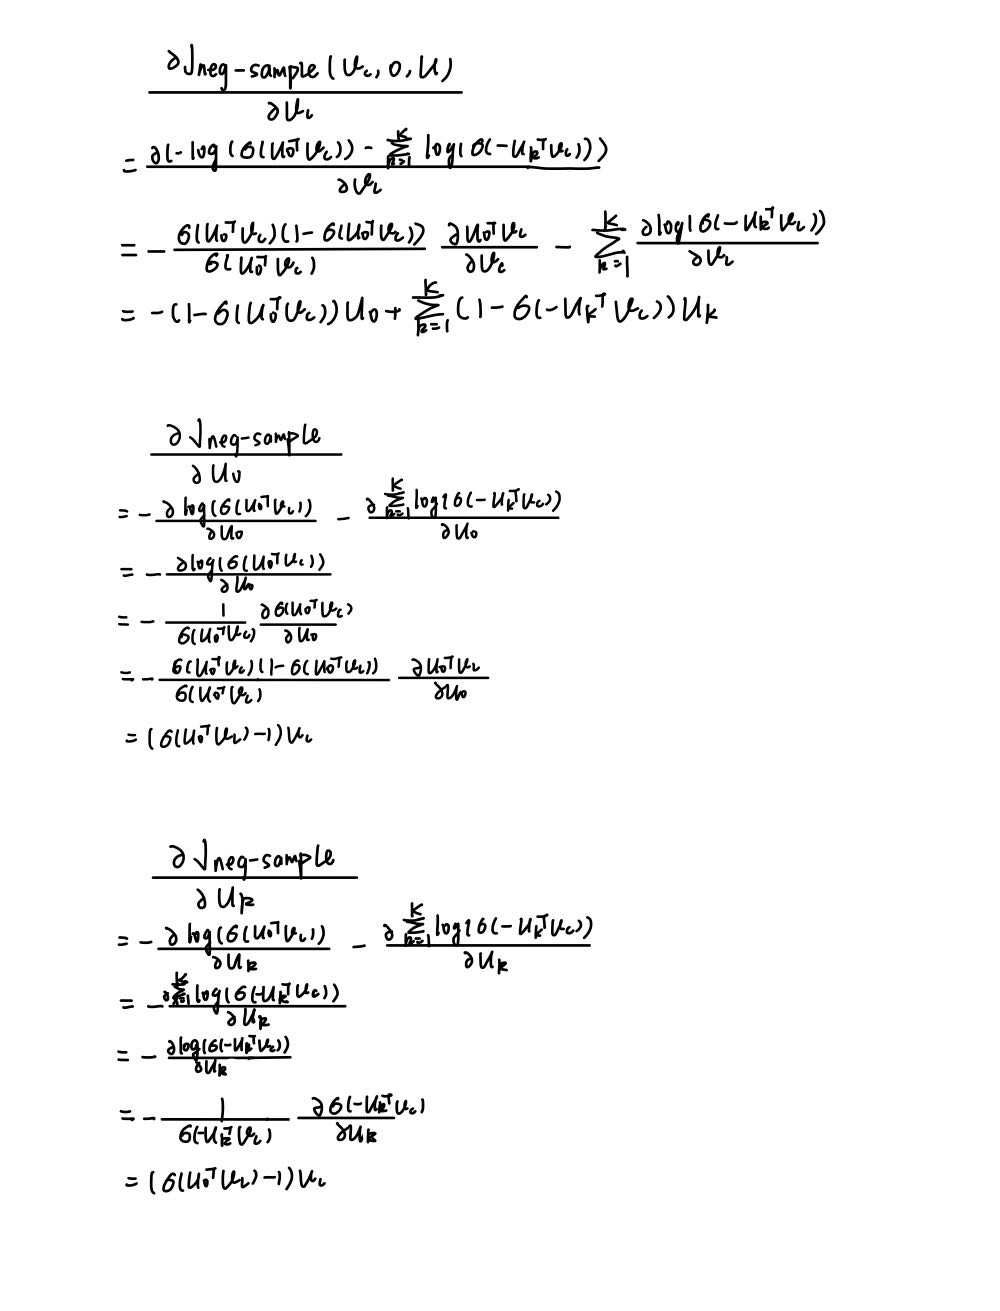

(ii)In lecture, we learned that an efficient implementation of backpropagation leverages the re-use
of previously-computed partial derivatives. Which quantity could you reuse amongst the three
partial derivatives calculated above to minimize duplicate computation? Write your answer in
terms of
$U_{o,{w1,...,wK}} =[u_o, −u_{w_1}
, . . . , −u_{w_K}]$, a matrix with the outside vectors stacked as columns,
and 1, a (K + 1) × 1 vector of 1’s.8 Additional terms and functions (other than $U_{o,{w1,...,wK}}$ and 1) can be used in your solution.

1-$\sigma$(U)

(iii) Describe with one sentence why this loss function is much more efficient to compute than the
naive-softmax loss.

不需要每一次都对所有进行内积，只需要采样就可

(h)(2 points) Now we will repeat the previous exercise, but without the assumption that the K sampled
words are distinct. Assume that K negative samples (words) are drawn from the vocabulary. For simplicity of notation we shall refer to them as $w_1, w_2, . . . , w_K$ and their outside vectors as $u_{w_1}, . . . ,u_{w_K}$ .
In this question, you may not assume that the words are distinct. In other words, $w_i = w_j$ may be
true when i $\neq$ j is true. Note that o $\notin$ {w1, . . . , wK}. For a center word c and an outside word o, the
negative sampling loss function is given by:
Jneg-sample($v_c$, o, U) = $-log(\sigma(u_0^Tv_c))-\sum_{s=1}^{k}{log(\sigma(-u_{w_s}^Tv_c))}$
for a sample $w_1, . . . w_K$, where σ(·) is the sigmoid function.
Compute the partial derivative of Jneg-sample with respect to a negative sample $u_{w_s}$. Please write your
answers in terms of the vectors $v_c and u_{w_s}$
, where s ∈ [1, K]. Show your work to receive full credit.
Hint: break up the sum in the loss function into two sums: a sum over all sampled words equal to
ws and a sum over all sampled words not equal to ws. Notation-wise, you may write ‘equal’ and ‘not
equal’ conditions below the summation symbols, such as in Equation

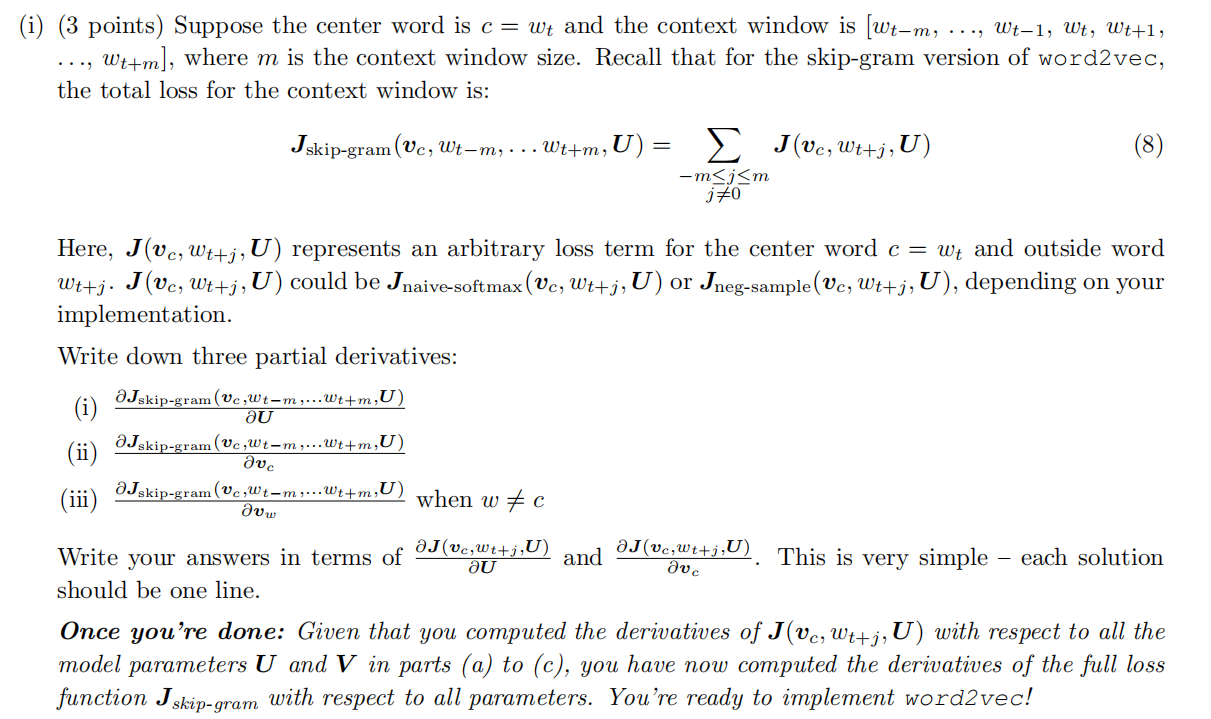

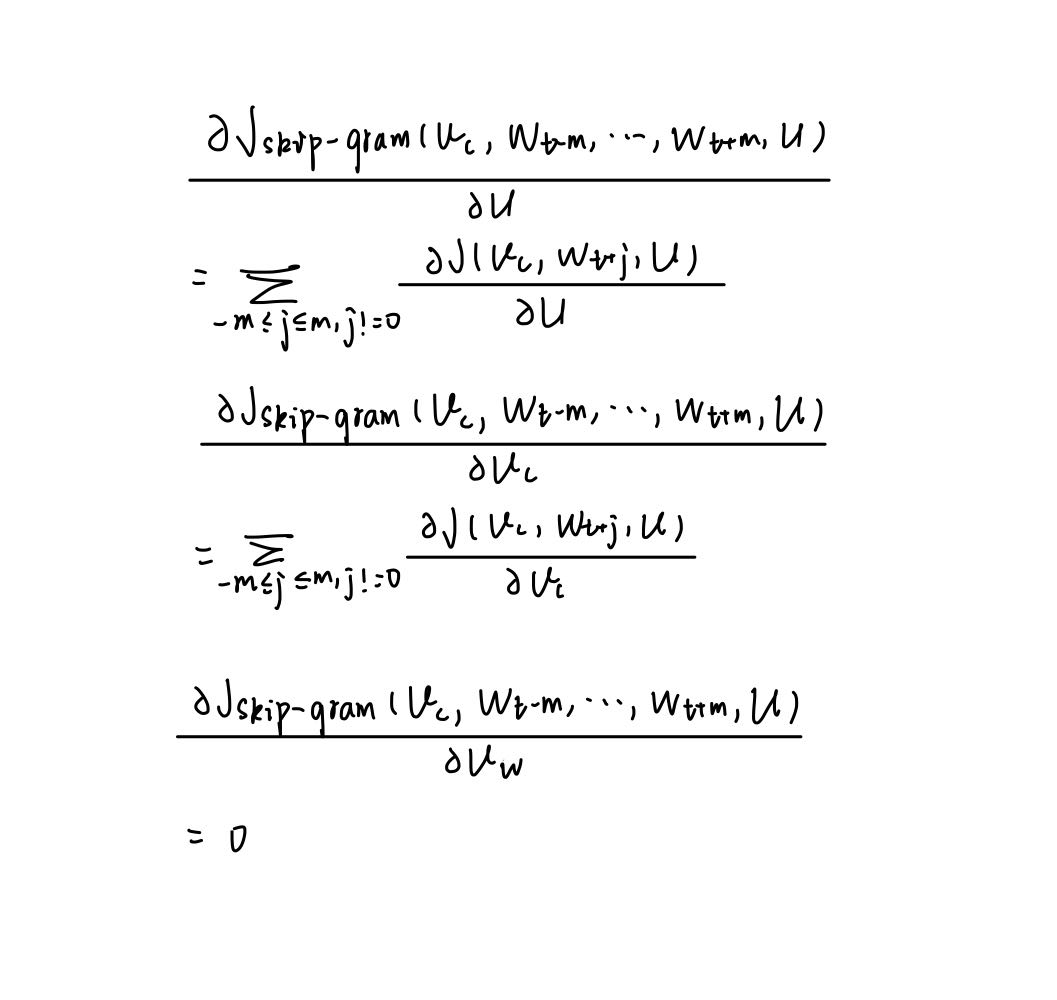